In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### 利用LR来预测波士顿房价

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
X.shape   #(506, 13)说明有506个样本，13个特征

(506, 13)

In [3]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# 将数据进行切分，分为训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [6]:
# 导入LR模型，喂数据
import time
from sklearn.linear_model import LinearRegression

model = LinearRegression()

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(time.clock()-start, train_score, cv_score))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

elaspe: 0.007242; train_score: 0.723941; cv_score: 0.795262


In [7]:
# 分析：上面的结果欠拟合，增加特征来解决

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

model = polynomial_model(degree=2)

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(time.clock()-start, train_score, cv_score))

Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('linear_regression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=True))],
         verbose=False)

elaspe: 0.039125; train_score: 0.930547; cv_score: 0.860049


### 欠拟合，增加特征值，效果明显有增加

<Figure size 3600x800 with 0 Axes>

<Figure size 3600x800 with 0 Axes>

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

elaspe: 5.385927


<Figure size 3600x800 with 0 Axes>

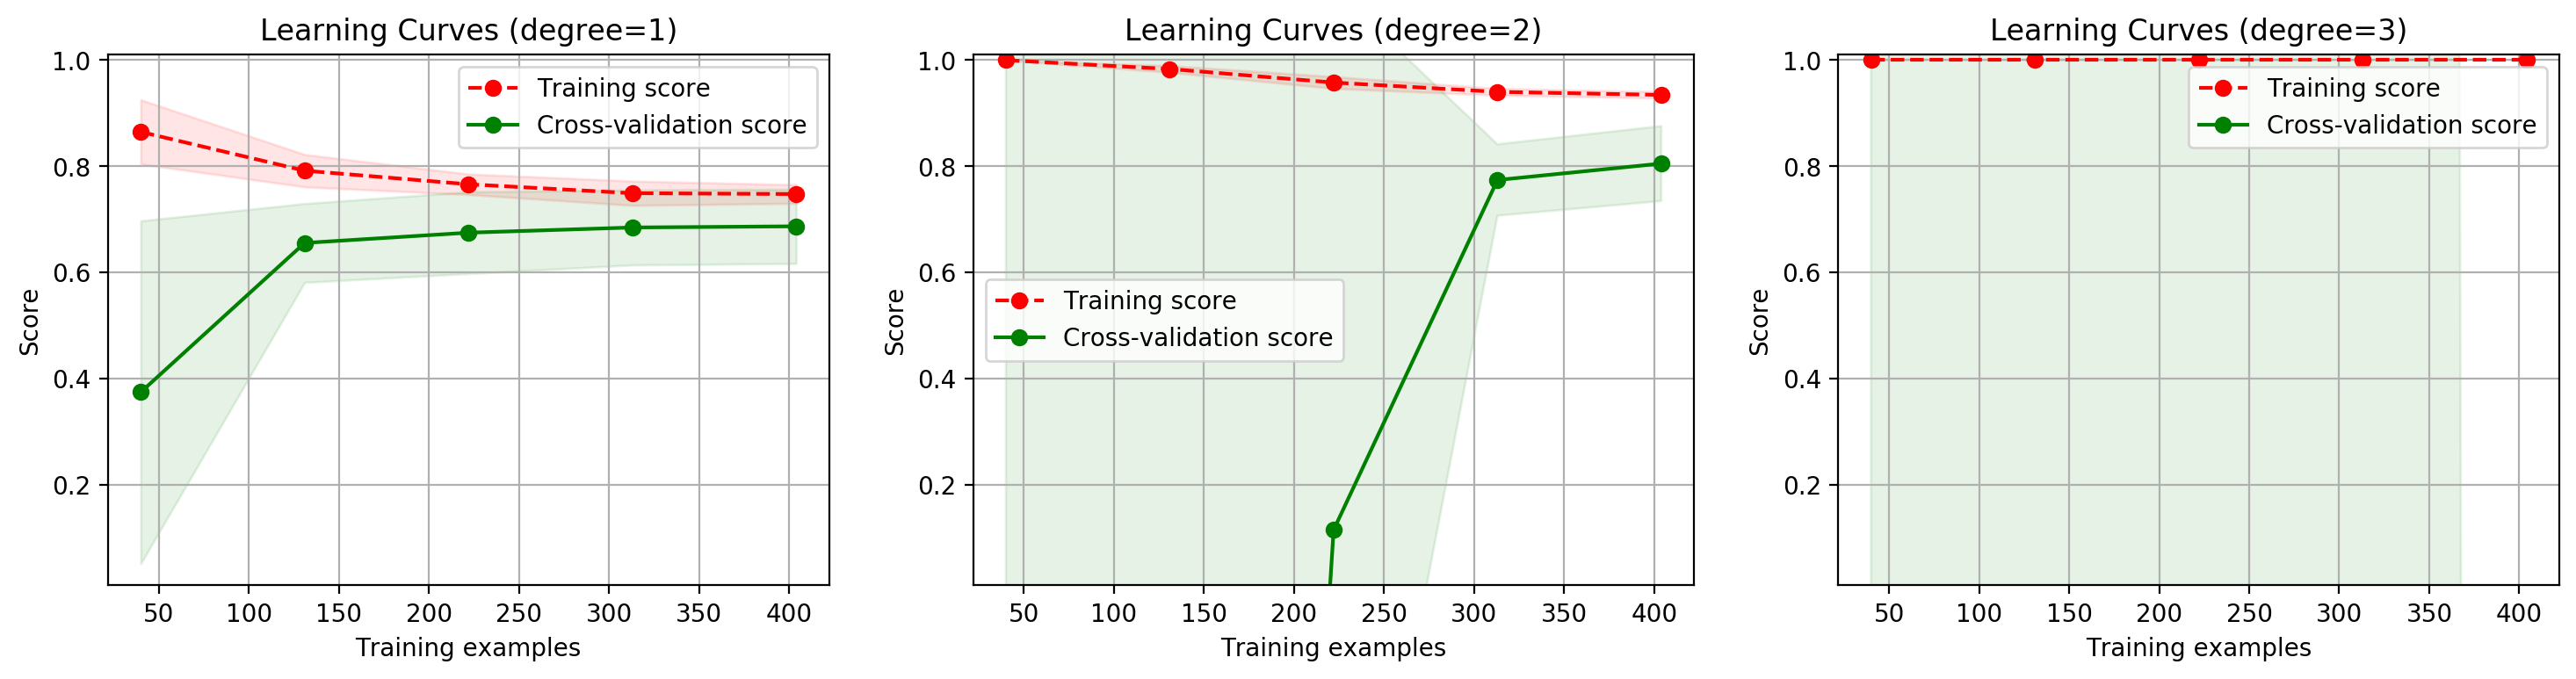

In [8]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(18, 4), dpi=200)
title = 'Learning Curves (degree={0})'
degrees = [1, 2, 3] #比较增加不同特征值的效果，看下面的图，发现degree=3时，train_score=1，cv=0，明显过拟合，说明这个方向不能继续优化了

start = time.clock()
plt.figure(figsize=(18, 4), dpi=200)
for i in range(len(degrees)):
    plt.subplot(1, 3, i + 1)
    plot_learning_curve(plt, polynomial_model(degrees[i]), title.format(degrees[i]), X, y, ylim=(0.01, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.clock()-start))